In [104]:
import numpy as np
import pandas as pd
# from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools
import copy
from collections import Counter
from TrackReconstruction_functions import *


hits_true = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_smear_0.h5", "MC/hits")
hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_5.0percent_smear_0.h5", "MC/hits")
# hits      = pd.read_hdf("../data/ATPC_0nubb/newfiles/ATPC_0nubb_1bar_0.1percent_smear_0.h5", "MC/hits")


# hits_true = pd.read_hdf("../data/krishan_bad_tracks/data/sophronia_1_208Tl.h5", "/MC/hits")
# hits = pd.read_hdf("../data/krishan_bad_tracks/data/sophronia_1_208Tl.h5", "/RECO/Events")
# hits_true.rename(columns={"event": "event_id"}, inplace=True)
# hits.rename(columns={"event": "event_id", "Ec": "energy", "X": "x", "Y": "y", "Z": "z"}, inplace=True)
# hits["event_id"] = (hits["event_id"]/2).astype(int)

display(hits)
print(hits.event_id.unique())

,event_id,x,y,z,energy
0,125,-112.650345,-638.874695,1402.178589,0.001959
1,125,-116.633698,-641.667786,1402.261719,0.001215
2,125,-119.557976,-650.131104,1402.480347,0.002207
3,125,-122.919815,-656.116821,1402.994507,0.000223
4,125,-113.837883,-649.346680,1403.156860,0.000074
...,...,...,...,...,...
127289,184,1843.353638,-1681.198608,2898.891846,0.001314
127290,184,1846.670898,-1686.653076,2899.513916,0.000322
127291,184,1847.559448,-1682.500366,2906.547119,0.000074
127292,184,1842.540405,-1688.742920,2906.561768,0.000050


[125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184]


,event_id,x,y,z,energy
8220,133,-577.249207,372.215790,2456.468750,0.000546
8221,133,-579.252625,370.694366,2456.829346,0.002827
8222,133,-575.134277,373.784973,2456.979248,0.002034
8223,133,-571.954285,375.958618,2457.408936,0.000372
8224,133,-570.099915,377.199982,2457.604248,0.000124
...,...,...,...,...,...
9291,133,-400.355133,870.778320,2841.473633,0.004538
9292,133,-402.415833,872.548706,2841.782227,0.000124
9293,133,-409.881500,878.945740,2841.801514,0.001786
9294,133,-405.464264,875.325012,2842.106689,0.003497


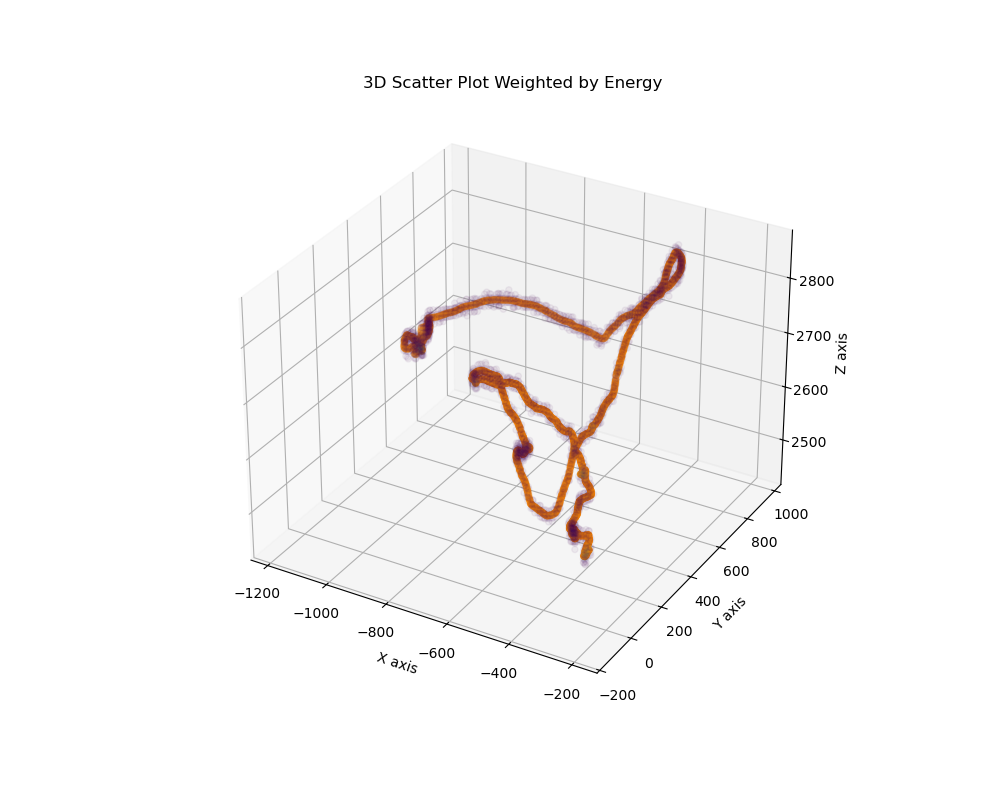

In [105]:
%matplotlib widget 

eid=133

data = hits[hits.event_id ==eid]
data_true = hits_true[hits_true.event_id ==eid]
display(data_true)


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


cut_data = data[data.energy > 0.0000]

# Normalize the energy values for the colors
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(cut_data.energy.min(), cut_data.energy.max())
colors = cmap(norm(cut_data.energy))


# Plot the scatter plot
scatter = ax.scatter(cut_data.x, cut_data.y, cut_data.z, c=colors, marker='o', alpha=0.05)
ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o', c="DarkOrange")

# ax.scatter(data_true['x'], data_true['y'], data_true['z']+3000, marker='o', c="DarkRed")

# Add color bar to indicate energy values
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(data.energy)
# cbar = plt.colorbar(mappable)
# cbar.set_label('Energy')

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot Weighted by Energy')

plt.show()

In [106]:
# There seems to be a duplicate row sometimes
data = data.drop_duplicates()

# display(data)
data = data[['event_id','x', 'y', 'z',"energy"]]

# Apply an energy cut
data = data[data.energy > 0.0000]

# shuffle the data to ensure we dont use g4 ordering
data = data.sample(frac=1).reset_index(drop=True)

# then sort it based on the x,y,z
data = data.sort_values(by=['x', "y", "z"]).reset_index(drop=True)

# Calculate the distance matrix
dist_matrix = distance_matrix(data[['x', 'y', 'z']], data[['x', 'y', 'z']])

display(data)
print(len(dist_matrix))

,event_id,x,y,z,energy
0,133,-1185.353638,646.604065,2618.346924,0.000025
1,133,-1179.994263,647.337646,2636.338135,0.000050
2,133,-1178.964844,652.402466,2612.441895,0.001116
3,133,-1178.730591,650.542480,2619.843506,0.005977
4,133,-1178.626465,658.198792,2627.104980,0.000471
...,...,...,...,...,...
2186,133,-194.159775,-119.032730,2611.051514,0.000124
2187,133,-194.145966,-116.936211,2584.992920,0.000025
2188,133,-194.073318,-117.597572,2598.861328,0.000174
2189,133,-194.049850,-118.509781,2590.189941,0.000174


2191


Mean z: 2672.1348  diffusion =  4.9039996829756225
Mean Sigma:  29
123 2.4568367683823453


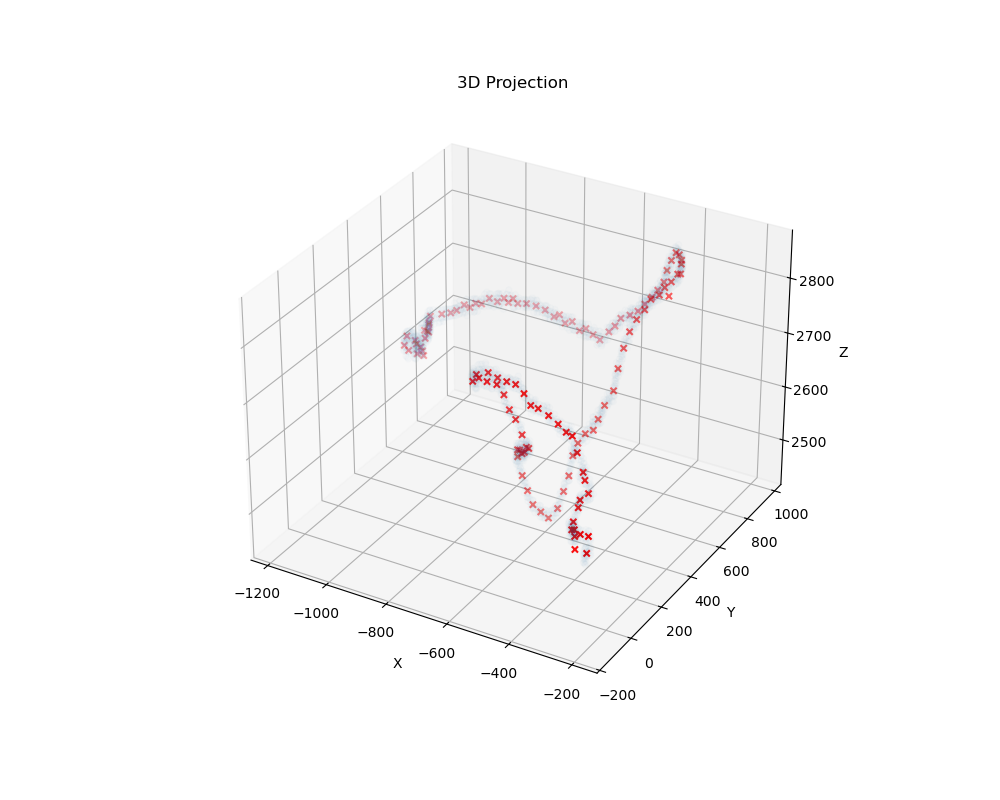

In [107]:

# all_visited = []
# radius  = 20 # workes well for 2 sigma c02 mix
# radius  = 0.5*np.sqrt(data.z.mean())
# print(radius)


def GetMinima(index, all_visited_, input_data, temp_dist_matrix, R):


    distances_from_index = temp_dist_matrix[index] # distances for node to others
    sorted_indices = np.argsort(distances_from_index) # indexes sorted by smallest distance

    closest_nodes = sorted_indices[distances_from_index[sorted_indices] < R]
    
    closest_nodes = list(set(closest_nodes) - set(all_visited_))

    selected_rows = input_data.iloc[closest_nodes] # Df containing the nodes within distance

    # Compute the mean of x, y, and z columns
    mean_x = selected_rows['x'].median()
    mean_y = selected_rows['y'].median()
    mean_z = selected_rows['z'].median()
    energy_sum = selected_rows['energy'].sum()
    mean_point = np.array([mean_x, mean_y, mean_z, energy_sum])

    all_visited = all_visited_ + list(closest_nodes)

    return mean_point, all_visited


def Cluster(input_data, R):

    node_centers = []
    all_visited = []
    indexes = input_data.index.values
    indexes_set = set(indexes)

    temp_dist_matrix = distance_matrix(input_data[['x', 'y', 'z']], input_data[['x', 'y', 'z']])

    for i in range(len(input_data)):

        all_visited_set = set(all_visited)

        # Convert arrays to sets and perform the difference
        filtered_indexes = list(indexes_set - all_visited_set)

        if not filtered_indexes:
            break

        # random_index = np.random.choice(filtered_indexes)
        random_index = filtered_indexes[0]
        median, all_visited = GetMinima(random_index, all_visited, input_data, temp_dist_matrix, R)

        node_centers.append(median)

    return pd.DataFrame(node_centers, columns=['x', 'y', 'z', 'energy'])


print("Mean z:", data.z.mean(), " diffusion = ", 0.3*np.sqrt(0.1*data.z.mean()))

mean_sigma = round(6*0.3*np.sqrt(0.1*data.z.mean()))
print("Mean Sigma: ", mean_sigma)

node_centers_df = Cluster(data, mean_sigma)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 30)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 20)
# node_centers_df = Cluster(node_centers_df, 75)

# display(node_centers_df)
print(len(node_centers_df), node_centers_df.energy.sum())

# -------

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.01)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o')

ax.scatter(node_centers_df['x'], node_centers_df['y'], node_centers_df['z'], marker='x',c="r")



ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()



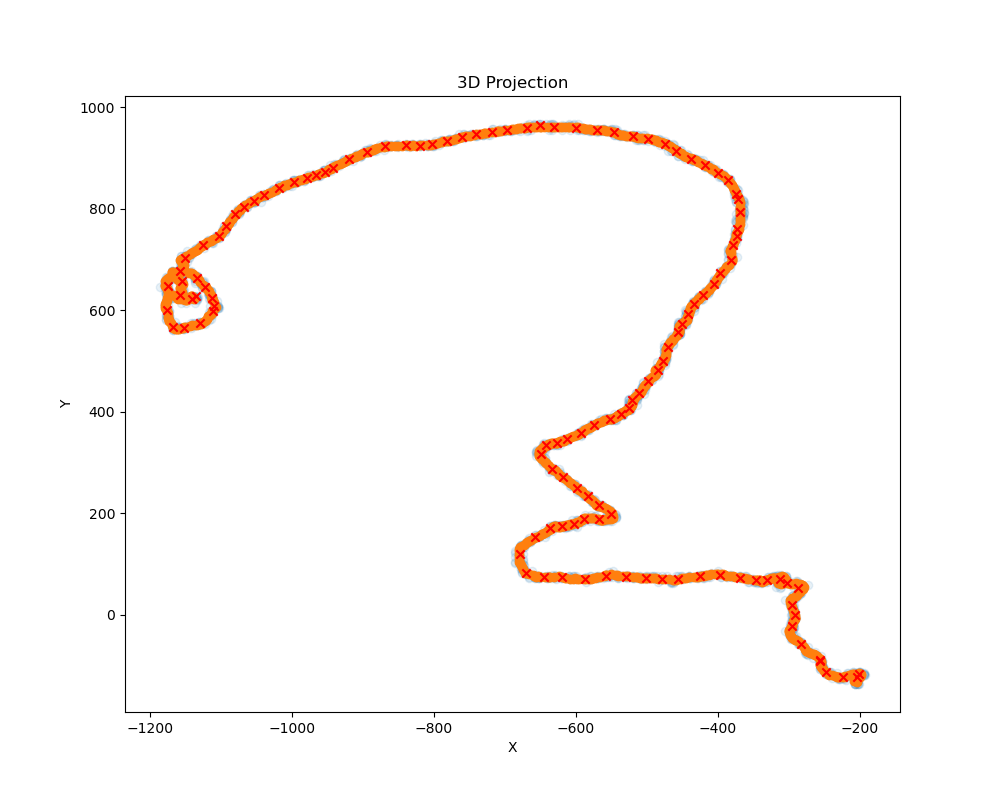

In [108]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['x'], data['y'], marker='o',alpha=0.1)
plt.scatter(data_true['x'], data_true['y'], marker='o')
plt.scatter(node_centers_df['x'], node_centers_df['y'], marker='x',c="r")

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()


In [109]:
# Create the bins ---- 
xmin=-3000
xmax=3000
xbw=mean_sigma*1

ymin=-3000
ymax=3000
ybw=mean_sigma*1

zmin=0
zmax=6000
zbw=mean_sigma*1

# bw = 10 works well for co2 mix with 2 sigma diffusion

# bins for x, y, z
xbins = np.arange(xmin, xmax+xbw, xbw)
ybins = np.arange(ymin, ymax+ybw, ybw)
zbins = np.arange(zmin, zmax+zbw, zbw)

# center bins for x, y, z
xbin_c = xbins[:-1] + xbw / 2
ybin_c = ybins[:-1] + ybw / 2
zbin_c = zbins[:-1] + zbw / 2


print(ybins)

databin = node_centers_df.copy()
databin["event_id"] = eid

# Now lets bin the data
databin['x_smear'] = pd.cut(x=databin['x'], bins=xbins,labels=xbin_c, include_lowest=True)
databin['y_smear'] = pd.cut(x=databin['y'], bins=ybins,labels=ybin_c, include_lowest=True)
databin['z_smear'] = pd.cut(x=databin['z'], bins=zbins,labels=zbin_c, include_lowest=True)



# Drop rows with any NaN values
databin = databin.dropna()

# Dictionary to store results
aggregated_data = {}

# Iterate through the DataFrame row by row
for _, row in databin.iterrows():
    key = (row['event_id'], row['x_smear'], row['y_smear'], row['z_smear'])
    
    if key not in aggregated_data:
        # Initialize the aggregation for a new group
        aggregated_data[key] = {
            'x_sum': row['x'],
            'y_sum': row['y'],
            'z_sum': row['z'],
            'energy_sum': row['energy'],
            'count': 1
        }
    else:
        # Update existing group values
        aggregated_data[key]['x_sum'] += row['x']
        aggregated_data[key]['y_sum'] += row['y']
        aggregated_data[key]['z_sum'] += row['z']
        aggregated_data[key]['energy_sum'] += row['energy']
        aggregated_data[key]['count'] += 1

# Convert aggregated data into a DataFrame
result = []
for key, values in aggregated_data.items():
    event_id, x_smear, y_smear, z_smear = key
    result.append({
        'event_id': event_id,
        'x_smear': x_smear,
        'y_smear': y_smear,
        'z_smear': z_smear,
        'x': values['x_sum'] / values['count'],   # Mean x
        'y': values['y_sum'] / values['count'],   # Mean y
        'z': values['z_sum'] / values['count'],   # Mean z
        'energy': values['energy_sum']            # Sum energy
    })

# Create final DataFrame
databin = pd.DataFrame(result)
display(databin)


[-3000 -2971 -2942 -2913 -2884 -2855 -2826 -2797 -2768 -2739 -2710 -2681
 -2652 -2623 -2594 -2565 -2536 -2507 -2478 -2449 -2420 -2391 -2362 -2333
 -2304 -2275 -2246 -2217 -2188 -2159 -2130 -2101 -2072 -2043 -2014 -1985
 -1956 -1927 -1898 -1869 -1840 -1811 -1782 -1753 -1724 -1695 -1666 -1637
 -1608 -1579 -1550 -1521 -1492 -1463 -1434 -1405 -1376 -1347 -1318 -1289
 -1260 -1231 -1202 -1173 -1144 -1115 -1086 -1057 -1028  -999  -970  -941
  -912  -883  -854  -825  -796  -767  -738  -709  -680  -651  -622  -593
  -564  -535  -506  -477  -448  -419  -390  -361  -332  -303  -274  -245
  -216  -187  -158  -129  -100   -71   -42   -13    16    45    74   103
   132   161   190   219   248   277   306   335   364   393   422   451
   480   509   538   567   596   625   654   683   712   741   770   799
   828   857   886   915   944   973  1002  1031  1060  1089  1118  1147
  1176  1205  1234  1263  1292  1321  1350  1379  1408  1437  1466  1495
  1524  1553  1582  1611  1640  1669  1698  1727  1

,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,133.0,-1187.5,639.5,2624.5,-1174.064453,647.005493,2620.528809,0.050741
1,133.0,-1187.5,610.5,2653.5,-1176.242676,600.267090,2639.705566,0.017137
2,133.0,-1158.5,581.5,2624.5,-1167.272217,567.459229,2631.414062,0.018873
3,133.0,-1158.5,668.5,2624.5,-1157.379883,677.138794,2634.990234,0.075640
4,133.0,-1158.5,639.5,2595.5,-1158.104126,629.869263,2601.980469,0.057660
...,...,...,...,...,...,...,...,...
108,133.0,-317.5,59.5,2682.5,-330.815552,68.244186,2693.869141,0.012549
109,133.0,-317.5,59.5,2653.5,-307.855515,66.282026,2656.419678,0.143294
110,133.0,-288.5,-27.5,2595.5,-296.304840,-22.038395,2600.790039,0.020782
111,133.0,-288.5,30.5,2624.5,-296.352509,19.626028,2628.360107,0.022171


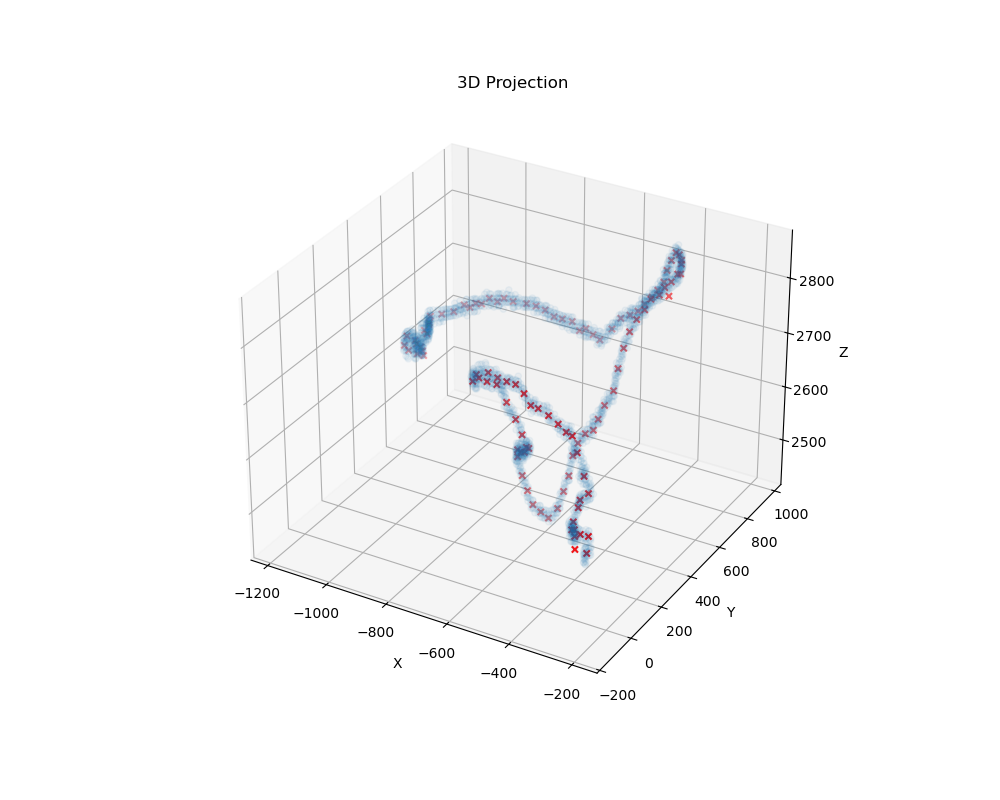

In [110]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data['x'], data['y'], data['z'], marker='o',alpha=0.05)
# ax.scatter(data_true['x'], data_true['y'], data_true['z'], marker='o',color="Teal")

ax.scatter(databin['x'], databin['y'], databin['z'], marker='x',c="r")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Projection')
plt.show()

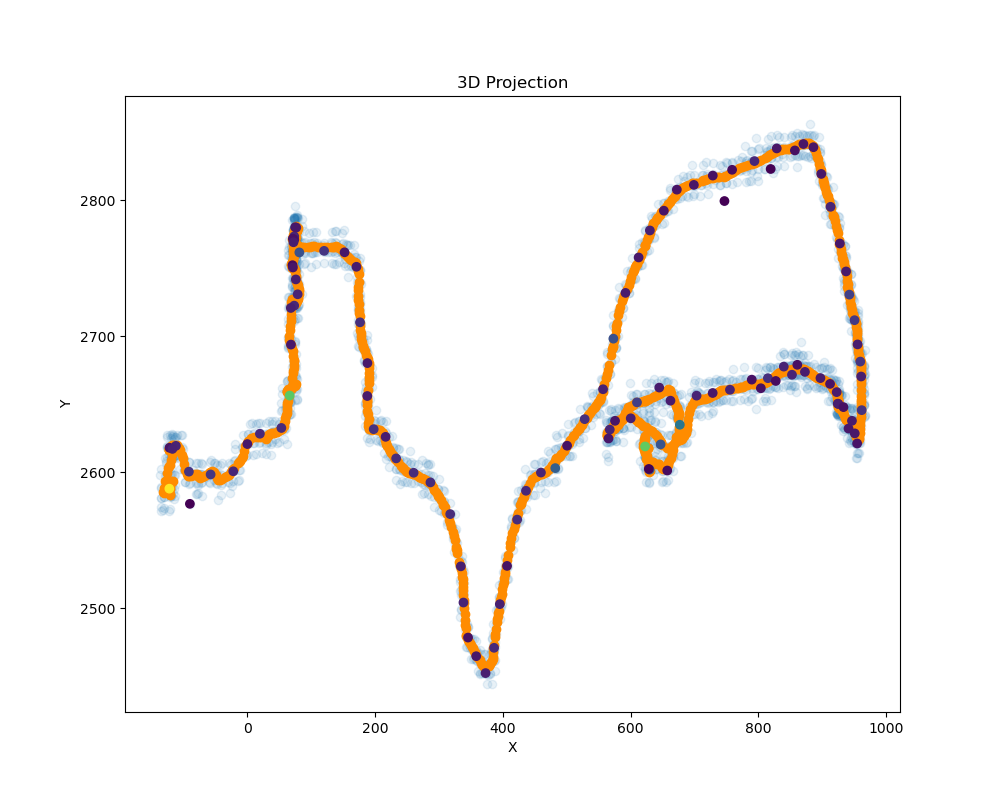

In [111]:
fig= plt.figure(figsize=(10, 8))

plt.scatter(data['y'], data['z'], marker='o',alpha=0.1)
plt.scatter(data_true['y'], data_true['z'], marker='o',color="DarkOrange")
# plt.scatter(data_true['y'], data_true['z'], marker='o',c=data_true["energy"])
plt.scatter(databin['y'], databin['z'], marker='o',c=databin['energy'])

plt.xlabel('X')
plt.ylabel('Y')

plt.title('3D Projection')
plt.show()

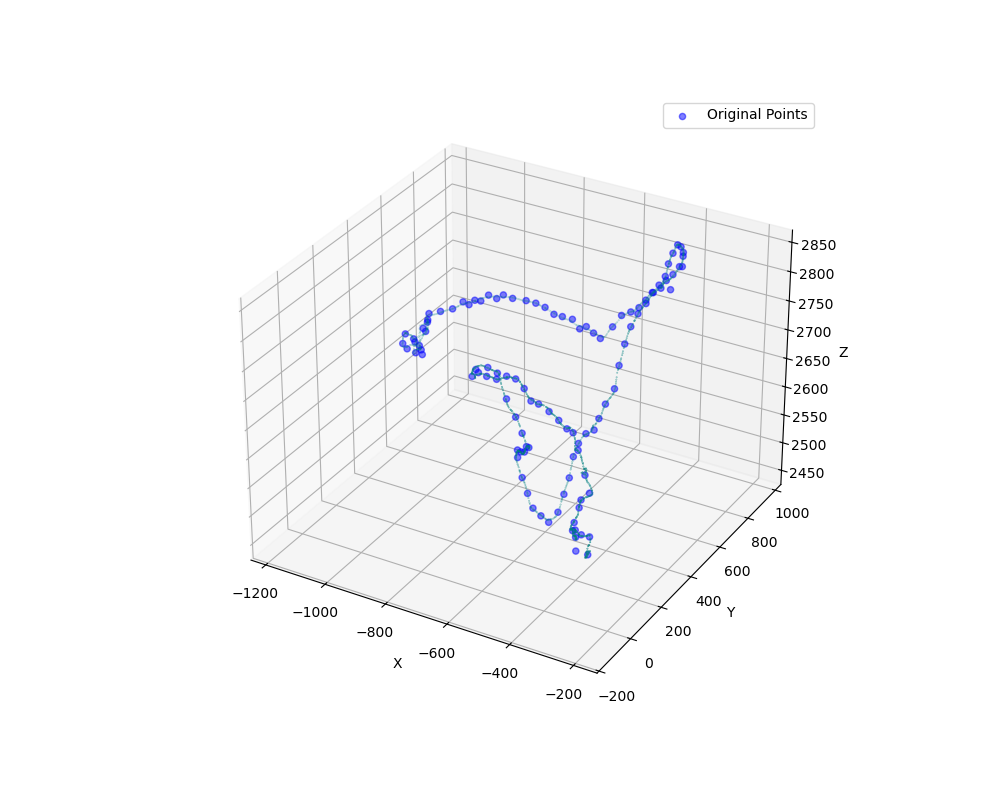

In [112]:

# Plot the original points and the polynomial fit
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(databin.x, databin.y,databin.z, color='blue', label='Original Points', alpha=0.5)
ax.scatter(data_true['x'], data_true['y'], data_true['z'],s=0.1 ,marker='o',color="Teal")

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

,event_id,x_smear,y_smear,z_smear,x,y,z,energy
0,133.0,-1187.5,639.5,2624.5,-1174.064453,647.005493,2620.528809,0.050741
1,133.0,-1187.5,610.5,2653.5,-1176.242676,600.267090,2639.705566,0.017137
2,133.0,-1158.5,581.5,2624.5,-1167.272217,567.459229,2631.414062,0.018873
3,133.0,-1158.5,668.5,2624.5,-1157.379883,677.138794,2634.990234,0.075640
4,133.0,-1158.5,639.5,2595.5,-1158.104126,629.869263,2601.980469,0.057660
...,...,...,...,...,...,...,...,...
108,133.0,-317.5,59.5,2682.5,-330.815552,68.244186,2693.869141,0.012549
109,133.0,-317.5,59.5,2653.5,-307.855515,66.282026,2656.419678,0.143294
110,133.0,-288.5,-27.5,2595.5,-296.304840,-22.038395,2600.790039,0.020782
111,133.0,-288.5,30.5,2624.5,-296.352509,19.626028,2628.360107,0.022171


Median distance to the closest row: 27.490009525389095
Dist Thresh 121.268
Pass Flag: True
The primary track is:  0
     event_id            x           y            z    energy   id  primary  \
0       133.0 -1174.064453  647.005493  2620.528809  0.050741    1        1   
1       133.0 -1154.305420  657.459534  2601.349609  0.006349    5        1   
2       133.0 -1158.104126  629.869263  2601.980469  0.057660    3        1   
3       133.0 -1134.558472  628.539307  2602.495850  0.000074    9        1   
4       133.0 -1141.112061  622.706848  2619.038574  0.145179    8        1   
..        ...          ...         ...          ...       ...  ...      ...   
108     133.0  -257.081177  -91.523369  2600.514160  0.029388  107        1   
109     133.0  -248.280701 -111.924057  2619.464844  0.019022  109        1   
110     133.0  -224.800827 -121.906326  2618.074219  0.009697  110        1   
111     133.0  -201.866394 -117.319054  2617.229248  0.017434  112        1   
112     133.0  

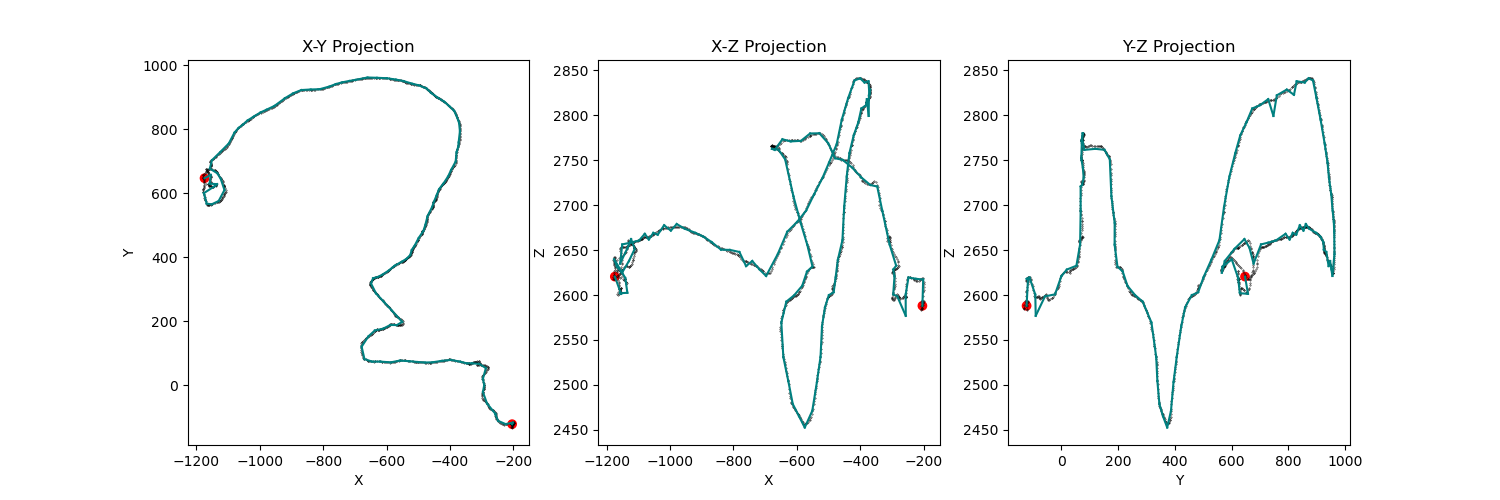

In [113]:
# Apply the tracking reconstruction

display(databin)


df, Tracks, connected_nodes, connection_count, pass_flag = RunTracking(databin[["event_id", "x", "y", "z", "energy"]], 0, 0)

df.index = df.id

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
# axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
# axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
# axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)

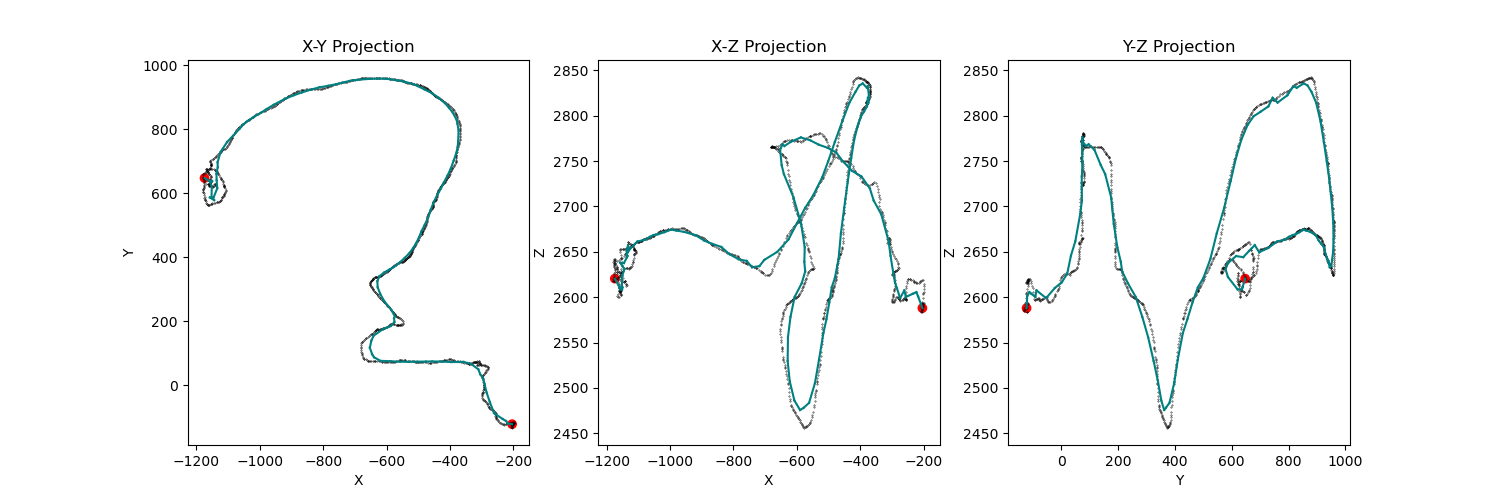

In [114]:
# Apply smoothing algorithm
# Compute rolling averages
r_size = 2

df['x_prev'] = df['x'].rolling(r_size, min_periods=1).mean().shift(1)
df['y_prev'] = df['y'].rolling(r_size, min_periods=1).mean().shift(1)
df['z_prev'] = df['z'].rolling(r_size, min_periods=1).mean().shift(1)

df['x_next'] = df['x'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['y_next'] = df['y'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)
df['z_next'] = df['z'].iloc[::-1].rolling(r_size, min_periods=1).mean().iloc[::-1].shift(-1)

# Define projection function
def project_onto_line(p, a, b):
    """Project point p onto line defined by points a and b."""
    ap = p - a
    ab = b - a
    ab_unit = ab / np.linalg.norm(ab)  # Normalize
    proj_length = np.dot(ap, ab_unit)  # Scalar projection
    proj_point = a + proj_length * ab_unit  # Convert back to point
    return proj_point

# Apply projection for each row
for i in range(len(df)):
    p = np.array([df.loc[i, 'x'], df.loc[i, 'y'], df.loc[i, 'z']])
    a = np.array([df.loc[i, 'x_prev'], df.loc[i, 'y_prev'], df.loc[i, 'z_prev']])
    b = np.array([df.loc[i, 'x_next'], df.loc[i, 'y_next'], df.loc[i, 'z_next']])
    
    if not np.isnan(a).any() and not np.isnan(b).any():
        proj_p = project_onto_line(p, a, b)
        df.loc[i, ['x', 'y', 'z']] = proj_p  # Replace with projected point

# Drop helper columns if not needed
df.drop(columns=['x_prev', 'y_prev', 'z_prev', 'x_next', 'y_next', 'z_next'], inplace=True)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# Plot xy projection
plot_tracks(axs[0], df['x'], df['y'], connection_count, 'X', 'Y', Tracks)
axs[0].scatter(data_true['x'], data_true['y'], marker='o',c="k", s=0.1)
# axs[0].scatter(data.x, data.y, c=colors, marker='o', alpha=0.5,s=3)

# Plot xz projection
plot_tracks(axs[1], df['x'], df['z'], connection_count, 'X', 'Z', Tracks)
axs[1].scatter(data_true['x'], data_true['z'], marker='o',c="k", s=0.1)
# axs[1].scatter(data.x, data.z, c=colors, marker='o', alpha=0.5,s=3)

# Plot yz projection
plot_tracks(axs[2], df['y'], df['z'], connection_count, 'Y', 'Z', Tracks)
axs[2].scatter(data_true['y'], data_true['z'], marker='o',c="k", s=0.1)
# axs[2].scatter(data.y, data.z, c=colors, marker='o', alpha=0.5,s=3)
